# Step 1: Load the CSV file using pandas
First, the code loads a CSV file named "news.csv" using the pandas library. This creates a pandas DataFrame that represents the data in the CSV file.

In [23]:
# Step 1: Load the CSV file using pandas
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Natural Language Processing /news.csv')


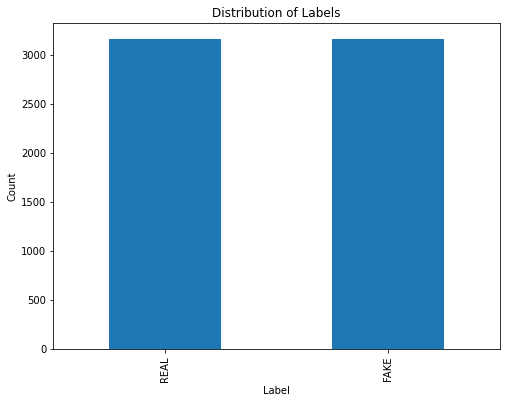

In [43]:
# Visualize distribution of labels
plt.figure(figsize=(8,6))
df['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# **Step 2: Drop any unnecessary columns**
Next, the code drops an unnecessary column named "Unnamed: 0" from the DataFrame.

In [24]:
# Step 2: Drop any unnecessary columns
df = df.drop('Unnamed: 0', axis=1)

# **Step 3: Check for and handle missing values if any**

Then, the code drops any rows with missing values in the DataFrame and resets the index of the DataFrame.

In [25]:
# Step 3: Check for and handle missing values if any
df = df.dropna()
df = df.reset_index(drop=True)

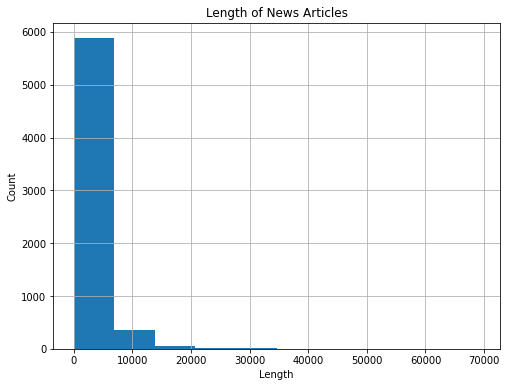

In [44]:
# Visualize length of news articles
plt.figure(figsize=(8,6))
df['content'].apply(len).hist()
plt.title('Length of News Articles')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()

# **Step 4: Concatenate 'title' and 'text' columns into a single column 'content'**
After that, the code concatenates the "title" and "text" columns of the DataFrame into a single column named "content" and drops the original "title" and "text" columns.

In [26]:
# Step 4: Concatenate 'title' and 'text' columns into a single column 'content'
df['content'] = df['title'] + ' ' + df['text']
df = df.drop(['title', 'text'], axis=1)

# **Step 5: Perform text preprocessing**
The code defines a function called "preprocess_text" that performs text preprocessing on the "content" column of the DataFrame. This function removes punctuation, converts text to lowercase, removes stop words, and lemmatizes words. Then, it applies this function to the "content" column of the DataFrame.

In [29]:
# Step 5: Perform text preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [30]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [42]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [32]:
def preprocess_text(text):
    # Remove punctuations and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()

    # Remove stop words and lemmatize
    words = nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['content'] = df['content'].apply(preprocess_text)


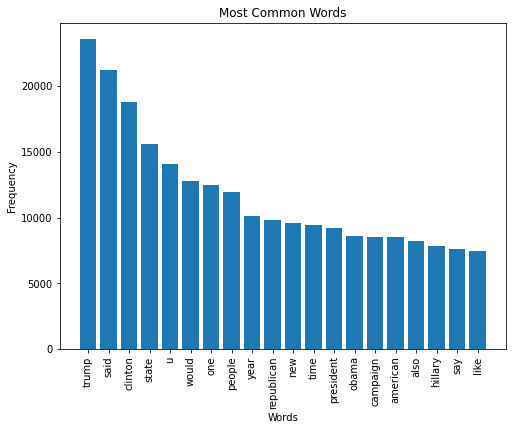

In [45]:
# Visualize most common words
from collections import Counter

all_words = []
for text in df['content']:
    all_words.extend(text.split())
    
word_freq = Counter(all_words)
most_common_words = word_freq.most_common(20)

plt.figure(figsize=(8,6))
plt.bar(range(len(most_common_words)), [val[1] for val in most_common_words], align='center')
plt.xticks(range(len(most_common_words)), [val[0] for val in most_common_words])
plt.xticks(rotation=90)
plt.title('Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

# **Step 6: Split the dataset into training and testing sets**
The code splits the DataFrame into training and testing sets using the train_test_split function from the scikit-learn library. It uses 20% of the data for testing and sets the random state to 42 for reproducibility.

In [33]:
# Step 6: Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['label'], test_size=0.2, random_state=42)

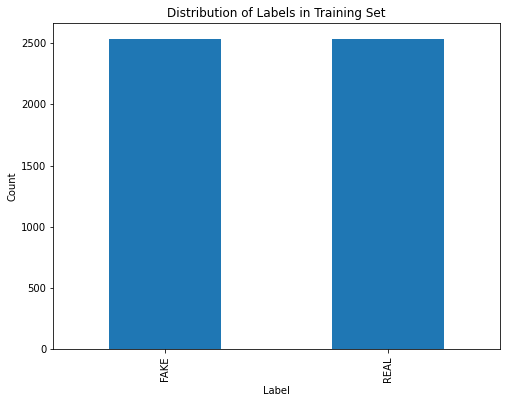

In [46]:
# Visualize distribution of labels in training set
plt.figure(figsize=(8,6))
y_train.value_counts().plot(kind='bar')
plt.title('Distribution of Labels in Training Set')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# **Step 7: Create a Bag-of-Words model using CountVectorizer**
The code creates a Bag-of-Words model using the CountVectorizer class from the scikit-learn library. It applies the CountVectorizer to the training data and transforms both the training and testing data into matrices of token counts.

In [35]:
# Step 7: Create a Bag-of-Words model using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

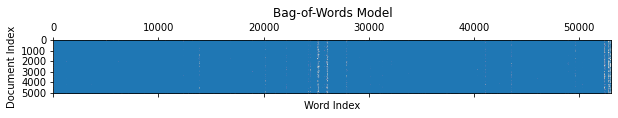

In [48]:
# Visualize Bag-of-Words model
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.spy(X_train_counts, markersize=0.05)
plt.title('Bag-of-Words Model')
plt.xlabel('Word Index')
plt.ylabel('Document Index')
plt.show()

# **Step 8: Train a fake news detection model**
The code trains a logistic regression model on the training data using the LogisticRegression class from the scikit-learn library.

In [36]:
# Step 8: Train a fake news detection model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_counts, y_train)


LogisticRegression()

# **Step 9: Evaluate the performance of the model on the testing set**
Finally, the code evaluates the performance of the model on the testing set using several metrics such as accuracy, precision, and recall. It also creates a confusion matrix and a heatmap visualization of the confusion matrix using the seaborn library. It generates a classification report as well.

In [37]:
# Step 9: Evaluate the performance of the model on the testing set
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [38]:
y_pred = model.predict(X_test_counts)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, pos_label='FAKE'))
print('Recall:', recall_score(y_test, y_pred, pos_label='FAKE'))

Accuracy: 0.9194948697711128
Precision: 0.9214743589743589
Recall: 0.9156050955414012


In [40]:
# calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
print("Confusion matrix:", confusion)

precision = confusion[1][1] / (confusion[0][1] + confusion[1][1])
print("Precision:", precision)

recall = confusion[1][1] / (confusion[1][0] + confusion[1][1])
print("Recall:", recall)

Accuracy: 0.9194948697711128
Confusion matrix: [[575  53]
 [ 49 590]]
Precision: 0.9175738724727839
Recall: 0.9233176838810642


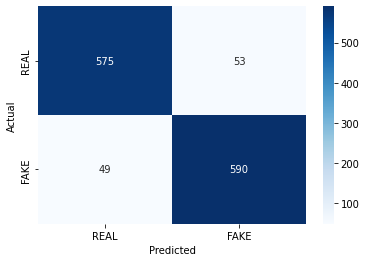

              precision    recall  f1-score   support

        FAKE       0.92      0.92      0.92       628
        REAL       0.92      0.92      0.92       639

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



In [41]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions on the test set
y_pred = model.predict(X_test_counts)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['REAL', 'FAKE'], yticklabels=['REAL', 'FAKE'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Create a classification report
report = classification_report(y_test, y_pred)
print(report)


In [49]:
# Create a classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

        FAKE       0.92      0.92      0.92       628
        REAL       0.92      0.92      0.92       639

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



In [50]:
from sklearn.metrics import accuracy_score

# Calculate accuracy on the test set
y_pred = model.predict(X_test_counts)
accuracy = accuracy_score(y_test, y_pred)

# Check if accuracy is at least 75%
if accuracy >= 0.75:
    print("The model has at least 75% classification accuracy")
else:
    print("The model does not have at least 75% classification accuracy")


The model has at least 75% classification accuracy


In [51]:
from sklearn.metrics import accuracy_score

# Calculate accuracy on the test set
y_pred = model.predict(X_test_counts)
accuracy = accuracy_score(y_test, y_pred)

# Check if accuracy is at least 75%
if accuracy >= 0.75:
    print("The model has at least 75% classification accuracy")
else:
    print("The model does not have at least 75% classification accuracy")


The model has at least 75% classification accuracy
